In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from analysis import PeptideAnalyzer

copy folder example_analysis_trajectories from doi: [10.3929/ethz-b-000599309](https://doi.org/10.3929/ethz-b-000599309) to [Analysis](../Analysis/)

In [3]:
folder = 'Example_analysis_trajectories/'

## Register Trajectories

In [4]:
pdbid = 'kayae'
pa = PeptideAnalyzer(folder,pdbid,False,False)
pa.register_explicit_traj('TIP5P',folder=folder)
pa.register_gnn_traj(folder,['vlifstp'],10,['1','2','161311'],'_pub_0601')

/localhome/kpaul/.conda/envs/implicitml/lib/python3.9/site-packages/mdtraj/core/trajectory.py:438: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn('top= kwargs ignored since this file parser does not support it')


<Figure size 432x288 with 0 Axes>

### Read in data and make analysis

In [5]:
pa.process_trajectories()
pa.detect_key_atoms()
pa.calculate_distances_for_trajs()
pa.calculate_histogram_data()
pa.calculate_colormaps()

10it [00:04,  2.31it/s]
10it [00:00, 27.60it/s]


### Plot free energy profiles

<Figure size 1080x720 with 0 Axes>

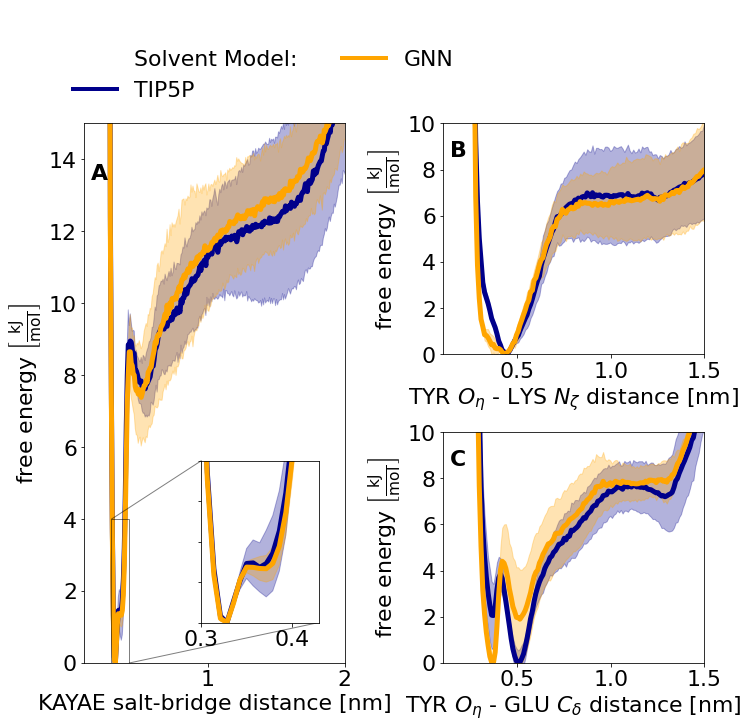

In [6]:
pa.initialize_plt((10,10))
sbdp_y = lambda x,y: pa.plot_saltbridge(x,y,([0.1,2],[0,15]),True)
oglu_y = lambda x,y: pa.plot_o_glu(x,y,([0.1,1.5],[0,10]))
olys_y = lambda x,y: pa.plot_o_lys(x,y,([0.1,1.5],[0,10]))
models = ['TIP5P','GNN_tr_vlifstpra_all']
legend = lambda x,y:  pa.plot_solvent_legend(x,y,models,2)
caption = pa.map_keys_and_plot(models,[[legend,legend],[sbdp_y,olys_y],[sbdp_y,oglu_y]],[0.1,1,1],filename='TYRComp.pdf',filedir='Pub_Graphs')

### Plot Phi Psi

<Figure size 720x720 with 0 Axes>

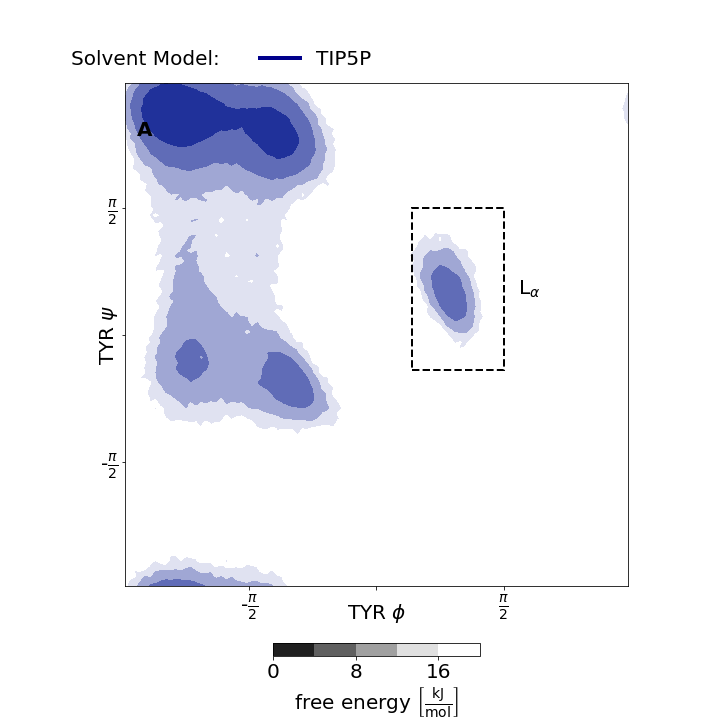

In [7]:
pa.initialize_plt((10,10),20)
levels = 4
vmax = 16
mark_state = [((25,-25),65,115,r'$\mathrm{L}_\alpha$')]
phipsi_vt5 = lambda x,y: pa.plot_phi_psi('TIP5P',y,levels=levels,vmax=vmax,mark_state=mark_state)
cbar = lambda x,y : pa.plot_colorbar_legend(x,y,levels=levels,vmax=vmax,horizontal=True)
blank = lambda x,y : pa.plot_blank(x,y)
models = ['TIP5P']
legend = lambda x,y: pa.plot_solvent_legend(x,y,models,1)
caption = pa.map_keys_and_plot(models,[[legend,legend],[phipsi_vt5,phipsi_vt5],[phipsi_vt5,phipsi_vt5],[cbar,cbar]],[0.1,1,1,0.1],width_ratios=[1,1],filename='phipsi.pdf', filedir='Pub_Graphs',caption_loc=[0,1,0,1])